Abstract

write once the report is done

Introduction

The housing market is an ever evolving field influenced by numerous factors at the same time. Predicting housing prices is an intricate task. The fluctuating prices are dependent on a variety of factors, ranging from objective property size to personal preferences. Some of these factors are; living space in square footage, number of floors in the house, view quality and house condition.
By employing multiple regression analysis, we aim to quantify the relationship between housing prices and several key predictors. With this research we wish to increase the clarity about the property prices in the continuously changing housing market. Understanding what drives housing prices in this dynamic and complex region is not only of interest to homeowners and potential home buyers but also beneficial for policymakers and urban planners.

Hypothesis

H0 (Null Hypothesis): The number of bathrooms and bedrooms, living space square footage, basement presence, total area above ground, number of floors in the house, view quality,
house condition, the year it was constructed, the number of years since it was renovated, and the grade of the building’s construction and design do not predict housing prices.

HA (Alternative Hypothesis): The number of bathrooms and bedrooms, living space square footage, basement presence, total area above ground, number of floors in the house, view quality,
house condition, the year it was constructed, the number of years since it was renovated, and the grade of the building’s construction and design can predict housing prices.


Data set

The dataset that will be used for multiple regression was found on kaggle<sup>1</sup> and uploaded by the user harlfoxem. The data comes from the real estate markets in King County, Washington State, USA, for the years 2014-2015. The dataset consists of approximately 22,000 properties. These individual data points supposedly come from the official King County government website<sup>2</sup> and were later added together to form the dataset that will be used. We could not verify that the individual data points did indeed come from the government database due to functionality issues surrounding the official site. 
The dataset itself includes 18 columns. 6 columns will immediately be excluded as these do not contribute to multiple regression analysis. These rows are; date, waterfront, street, city, statezip and country. The rows that have been included are:
- price
- bedrooms
- bathrooms
- sqft_living = square feet of inside space
- sqft_lot = square feet of outside space
- floors
- view
- condition
- sqft_above = square feet above ground
- sqft_basement = square feet of basement
- yr_built = year built
- yr_renovated = year renovated
- sqft_living15 = square feet of the living area of the closest 15 neighbors

The dataset does not contain any missing values. 

Population

With the sample of housing prices in the King County area of the Washington state in the years of 2014-2015, we will attempt to generalize our findings to the population of all housing properties in said area (e.c. king County) for the corresponding time span (years 2014-2015). The total number of housing units in the King County area in 2010 was 851261. We weren't able to find the number of homes for the target years of this study, but we assume that the numbers don't vary significantly in those couple years.


Imports and Uploading The Dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot

sns.set_style("whitegrid")

houseData = pd.read_csv('Rostyslav_Redchyts-Niels_Metselaar-data.csv') #the name of the dataset will be houseData

Response Variable

The response variable that will be investigated is price. Price is a continuous variable spanning from 0 to infinity. The price range for this dataset ranges between 0 and 8 million US dollars. The distribution of the response variable is generated in the distribution of housing prices plot below. To further analyse the normality of the distribution a QQ plot is also generated. If the data distribution follows the diagonal line in the plot, it suggests that the data is normally distributed.

To account for the non-normal distribution of the data(as seen in the first plot) a log transformation has been applied to the price variable. Taking the log of the data ensures that the distribution will be more symmetric by stabilizing the variance across the range of values. The data will now resemble a normal distribution.

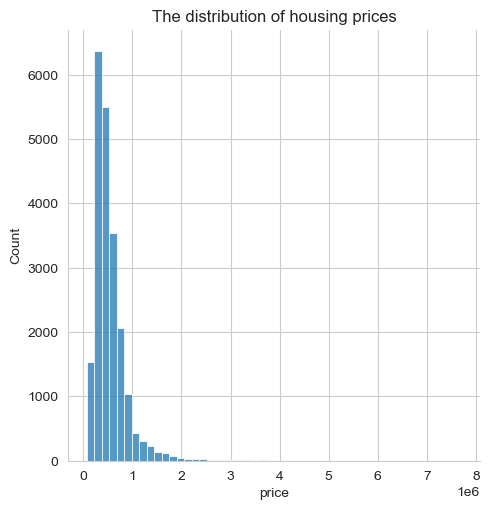

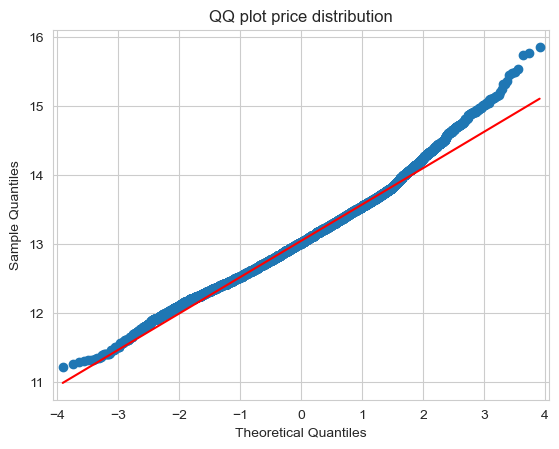

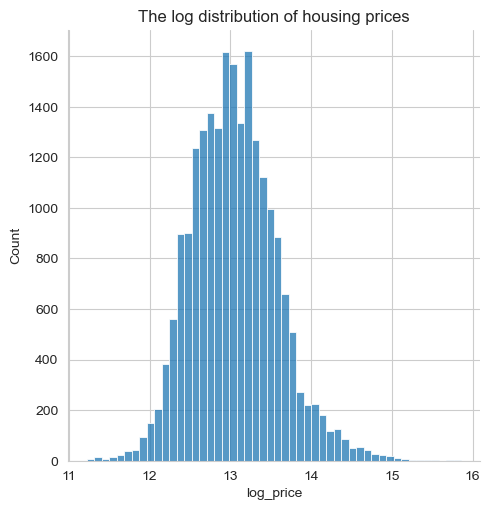

In [4]:
#checking normality of response variable
sns.displot(houseData['price'], bins=50)
plt.title('The distribution of housing prices')
plt.show() 

#log transformation
houseData['log_price'] = np.log(houseData['price'])

#checking normality of response variable after log transformation
sm.qqplot(houseData['log_price'], line='s')
plt.title('QQ plot price distribution')
plt.show()

sns.displot(houseData['log_price'], bins=50)
plt.title('The log distribution of housing prices')
plt.show()


Explanatory variables

To determine if the housing price can accurately be predicted a number of variables will be used. All of the variables used will be numerical. 
The following variables will be examined. 1. bedrooms. 2. bathrooms 3. sqft_living. 4. sqft_lot. 5. floors. 6. view. 7. condition. 8. sqft_above. 9. sqft_basement. 10. yr_built. 11. the year in which the house was renovated. 

1. The first variable, bedrooms, refers to the amount of bedrooms in the house. This variable is discrete and ranges between 0-33 in the dataset. 

2. The second variable, bathrooms, refers to the amount of bathrooms present in the building. This variable is discrete just like the bedroom variable. The variable ranges between 0-8 in the dataset.

3. The third variable, sqft_living, refers to the amount of square feet of space inside the house. This variable is continous and ranges between roughly 200-14000 sqft in the dataset

4. The fourth variable, sqft_lot, refers to the amount of square feet of space surrounding the house. This variable is continous and ranges between roughly 0-170000 sqft in the dataset

5. The fifth variable, floors, refers to the amount of floors present inside the house. The variable is discrete and ranges between 1-3.5 in the dataset

6. The sixth variable, view, refers to the quality of the view. This variable is discrete and can range between 0-4 in the dataset.

7. The seventh variable, condition, refers to the condition of the building. This variable is discrete and can range between 1-5 in the dataset.

8. The eight variable, sqft_above, refers to the amount of square feet of property located above ground level. This variable is continous and can take on a value between roughly 400-10000 sqft in the dataset.

9. The ninth variable, sqft_basement, refers to the amount of square feet located below ground level. This variable is continous just like sqft_above, and can take on a value between 0-5000 sqft in the dataset.

10. The tenth variable, yr_built, refers to the year in which the house was built. The variable is discrete and can range between 1900-2015 in the dataset.

11. The eleventh variable, yr_renovated refers to the year in which the house was renovated. This variable includes a large amount of variable with the value 0. This means that the building has not yet been renovated. The variable is continous and can range between 0-2015, although it is important to point out that the variables either take on a value of 0 or range between roughly 1950-2015 in the dataset. 

12. The twelfth variable, grade, refers to the overall grade given to the building’s construction and design. This variable is discrete and ranges between 1-13 in the dataset.

To fit the model, every explanatory variable should undergo univariate analysis. The code below has been used to visualize the data.


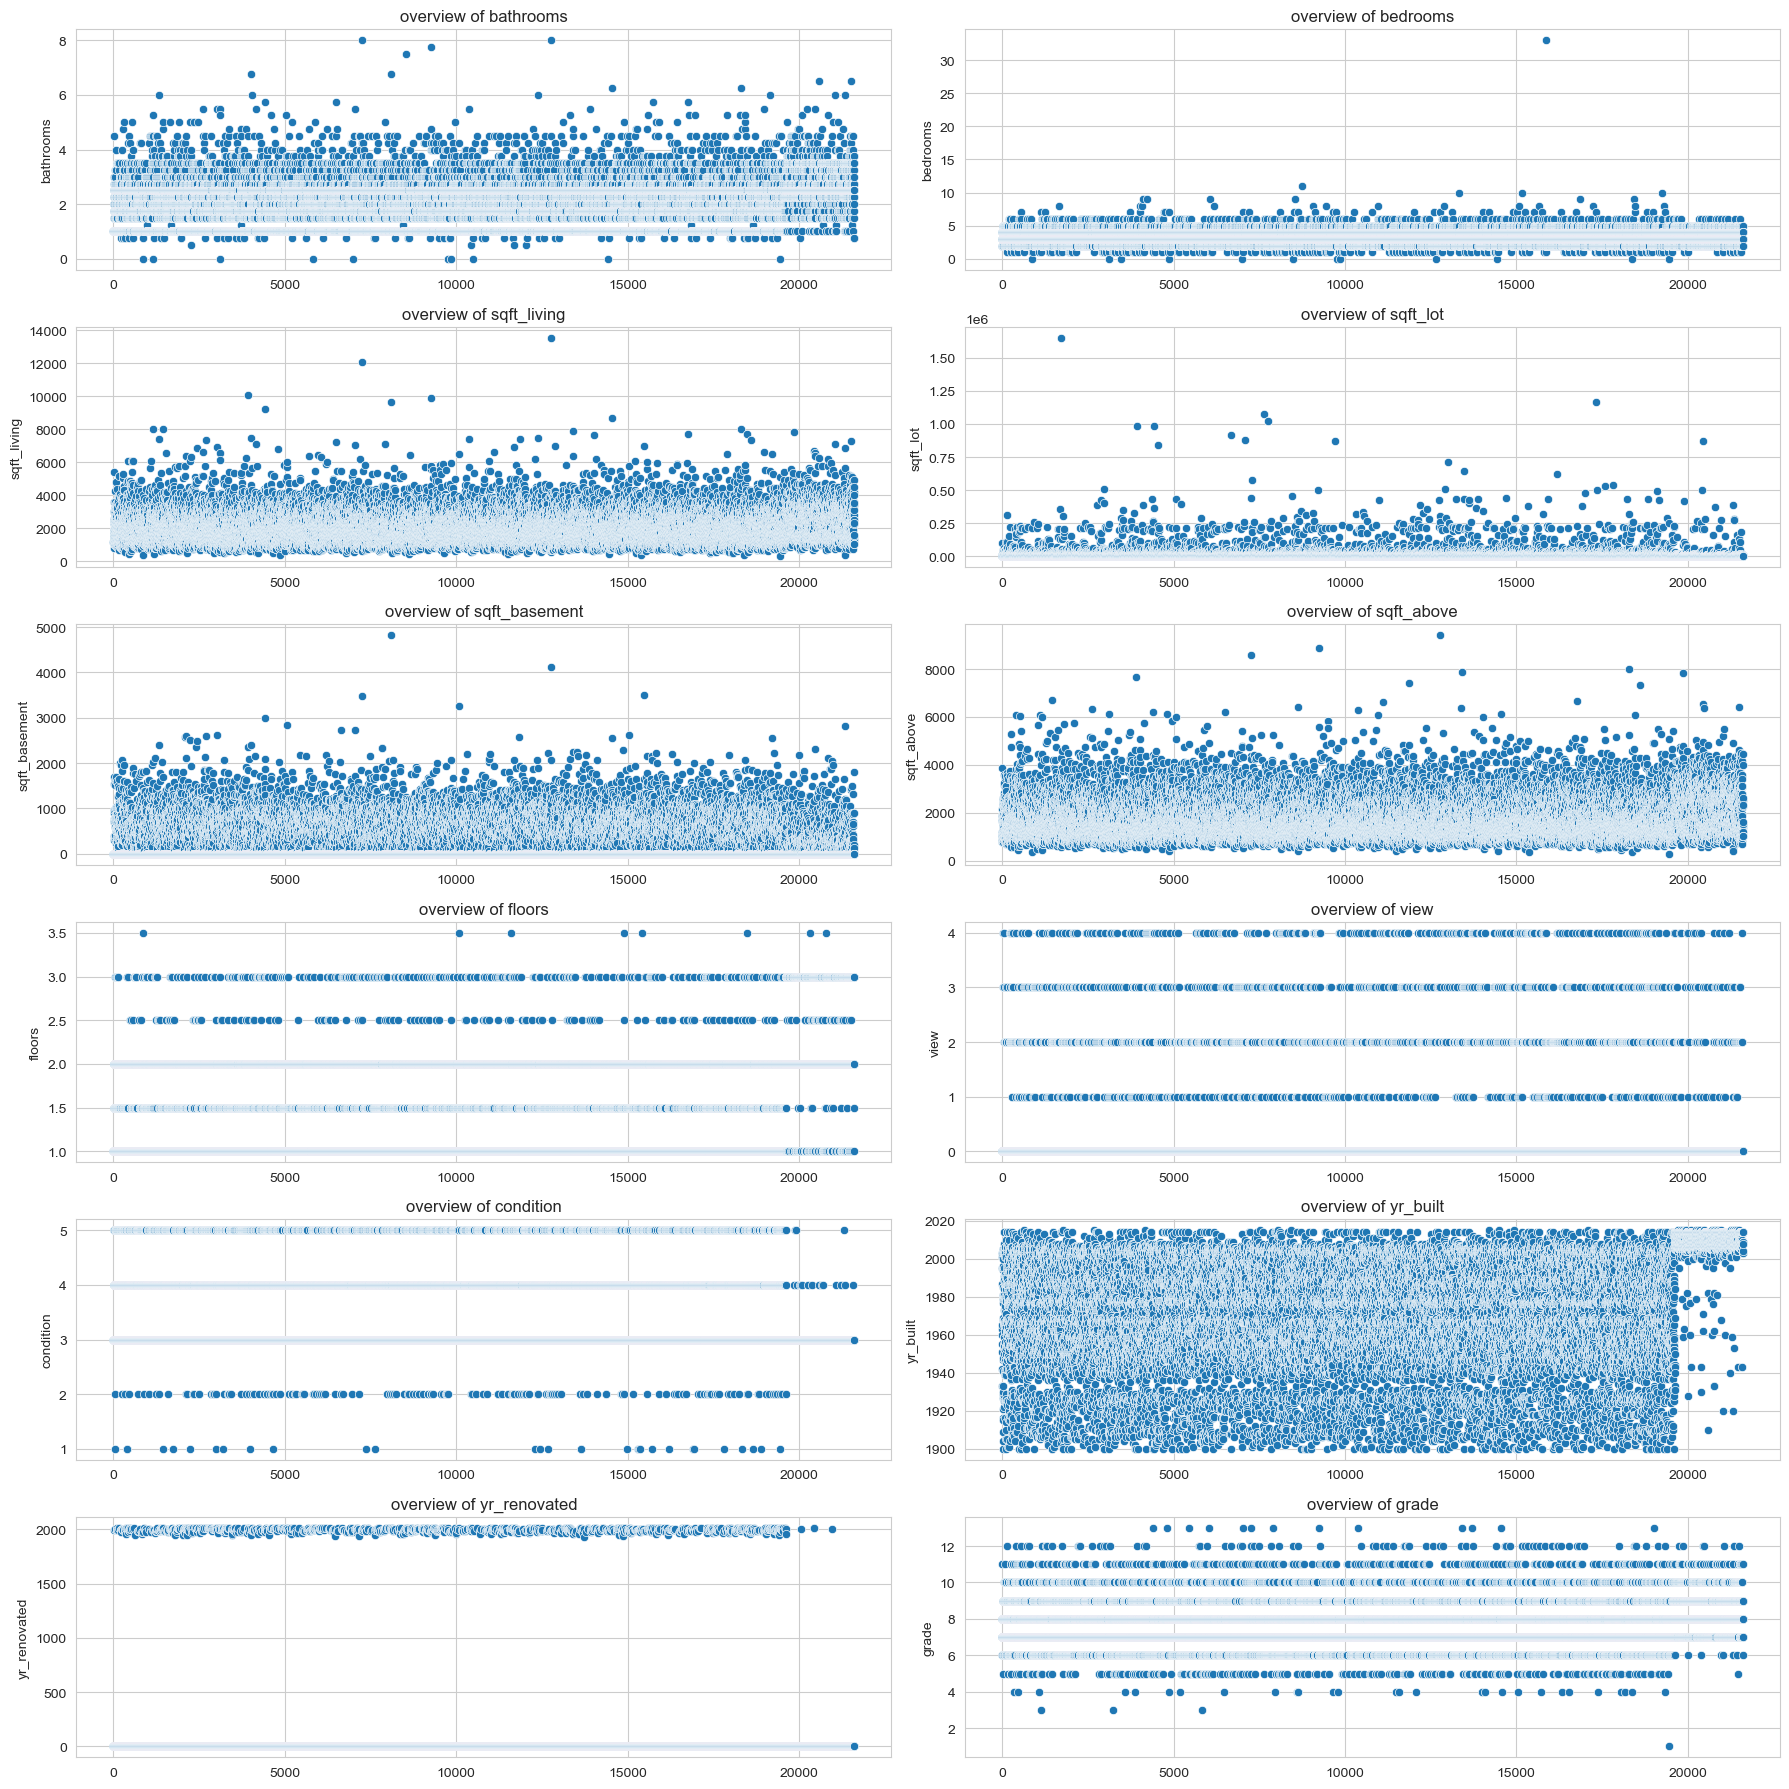

In [49]:
fig, axes = plt.subplots(6, 2, figsize = (18, 18))
ax = axes.flatten()
column_names = ['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_basement',
           'sqft_above', 'floors', 'view', 'condition', 'yr_built', 'yr_renovated', 'grade']

for i in range(len(column_names)):
     sns.scatterplot(houseData[column_names[i]], ax=ax[i])
     ax[i].set_title('overview of {}'.format(column_names[i]))

plt.tight_layout()

Fitting the model



References
<div style="font-size: 80%; margin-top: 0.5em;">1. https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data. </div>
<div style="font-size: 80%; margin-top: 0.5em;">2. https://kingcounty.gov/. </div>

